In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Display settings
pd.options.display.max_columns = None
sns.set(style='whitegrid')

In [7]:
df = pd.read_csv('/content/netflix_titles.csv')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]>

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [16]:
df.info()
df.isnull().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<bound method DataFrame.sum of       show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      False        False  
2            False   False     False      False        False  
3            False   False     False      False        False  
4            False   False     False      False        False  
...            ...     ...       ...        ...          ...  
8802         False   False     False      False        False  
8803         False   False     False      False        False  
8804         False   False     False      False        False  
8805         False   False     False      False        False  
8806         False   False     False      False        False  

[8807 rows x 12 columns]>

In [18]:
df = df.copy()
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [20]:
print("Null Values After Filling:")
print(df.isnull().sum())

Null Values After Filling:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


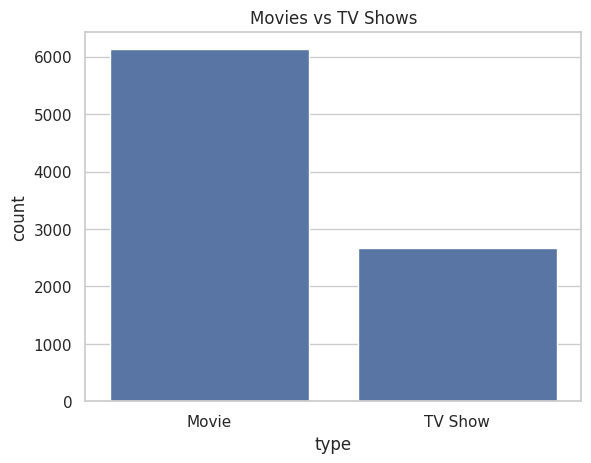

In [22]:
# Number of Movies vs TV Shows
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.show()

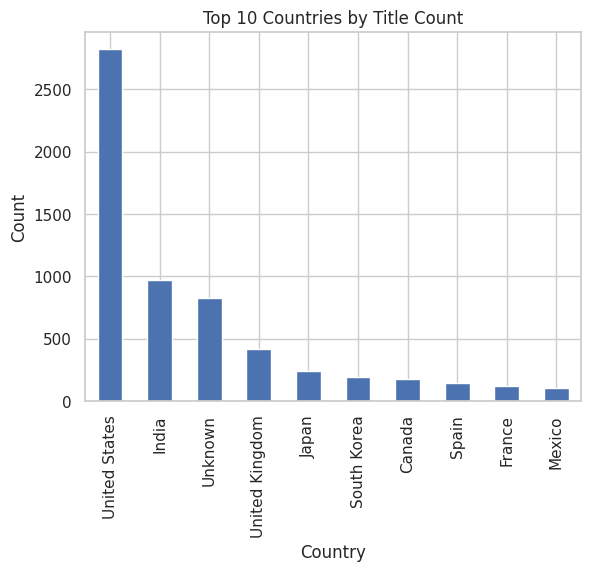

In [24]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Title Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

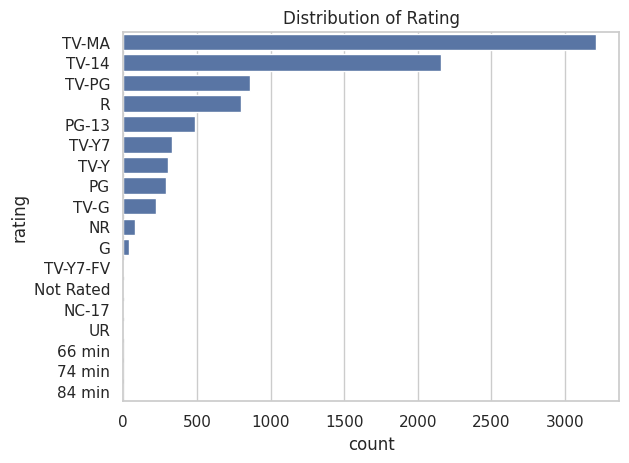

In [26]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Rating')
plt.show()

Outliers in Movie Duration:
                                title  duration_int
22                    Avvai Shanmughi           161
24                              Jeans           166
45             My Heroes Were Cowboys            23
71        A StoryBots Space Adventure            13
73                       King of Boys           182
...                               ...           ...
8763  WWII: Report from the Aleutians            45
8764                       Wyatt Earp           191
8770                          Yaadein           171
8788                     You Carry Me           157
8802                           Zodiac           158

[450 rows x 2 columns]


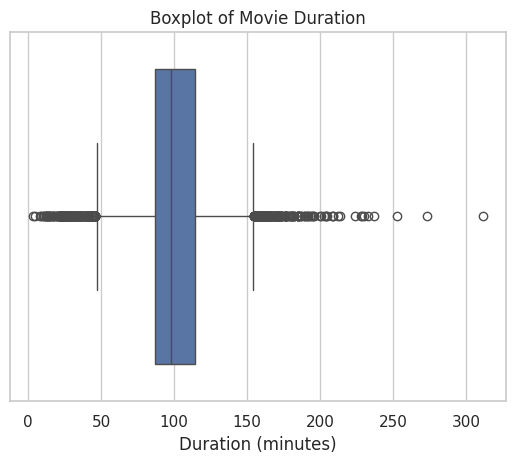

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, make sure we have a separate copy
movie = df.copy()
movie = movie.copy()
movie = movie[movie['type'] == 'Movie']

# Convert Duration to integer safely
movie['duration_int'] = pd.to_numeric(movie['duration'].str.split(' ').str[0], errors='coerce')

# Remove rows where we couldn't parse a duration
movie = movie[movie['duration_int'].notnull()]
movie['duration_int'] = movie['duration_int'].astype(int)

# Now we can proceed with identifying outliers
Q1 = movie['duration_int'].quantile(0.25)
Q3 = movie['duration_int'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = movie[(movie['duration_int'] < lower_bound) |
                 (movie['duration_int'] > upper_bound)]

print("Outliers in Movie Duration:")
print(outliers[['title', 'duration_int']])

# Boxplot (without NaNs)
sns.boxplot(x=movie['duration_int'])
plt.title('Boxplot of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.show()

In [30]:
# Combine features
df['combined_features'] = df['title'].astype(str) + ' ' + df['director'].astype(str) + ' ' + df['cast'].astype(str) + ' ' + df['listed_in'].astype(str)

# Transform into vector
vector = CountVectorizer(stop_words='english')
matrix = vector.fit_transform(df['combined_features'])

# Cosine similarity
similar = cosine_similarity(matrix)

def recommend(title, n=5):
    idx = df.index[df['title'].str.lower() == title.lower()].tolist()
    if not idx:
        return f"Movie or TV show titled '{title}' not found in the dataset."

    idx = idx[0]
    scores = list(enumerate(similar[idx]))

    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    recommended_indices = [i[0] for i in scores[1:n+1]]

    return df['title'].iloc[recommended_indices]

# Example
print("Movies/TV shows similar to 'Breaking Bad':")
print(recommend('Breaking Bad'))

Movies/TV shows similar to 'Breaking Bad':
2931         Better Call Saul
3581               MINDHUNTER
5038                  Re:Mind
1535    How To Ruin Christmas
6841               Get Shorty
Name: title, dtype: object


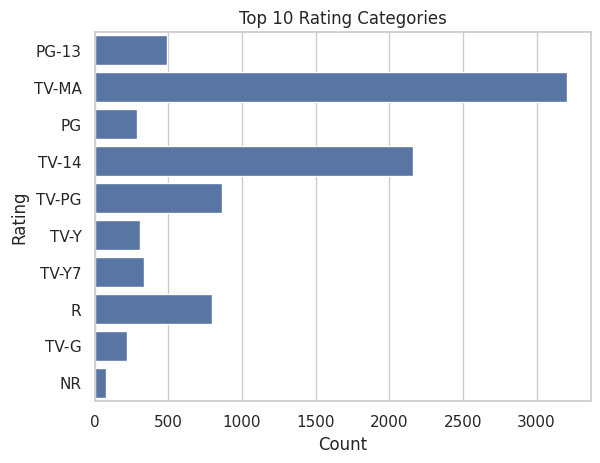

In [32]:
# Top 10 Rating Categories
top_ratings = df['rating'].value_counts().nlargest(10)

sns.countplot(y='rating', data=df[df['rating'].isin(top_ratings.index)])

plt.title('Top 10 Rating Categories')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

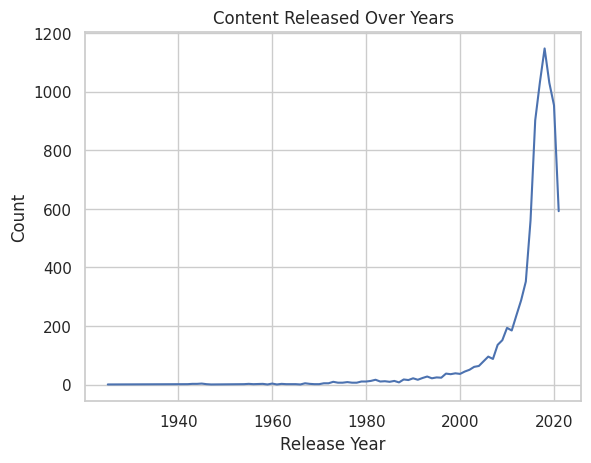

In [34]:
release_counts = df['release_year'].value_counts().sort_index()

release_counts.plot(kind='line')
plt.title('Content Released Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

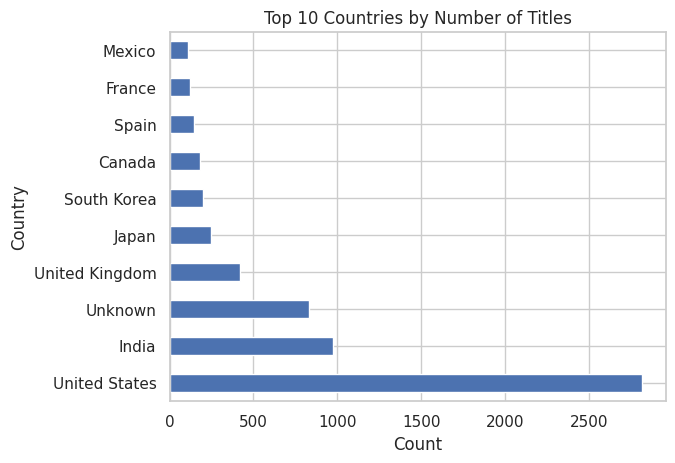

In [36]:
top_countries = df['country'].value_counts().nlargest(10)

top_countries.plot(kind='barh')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [38]:
movie_durations = movie.copy()
movie_durations = movie_durations.copy()
movie_durations = movie_durations[movie_durations['duration_int'].notnull()]

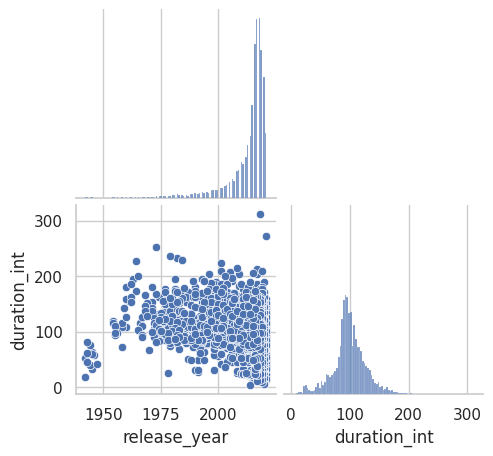

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore", FutureWarning)  # <- Correct filter

fig = sns.pairplot(movie_durations[['release_year', 'duration_int']],
                   corner=True)

fig.fig.subplots_adjust(top=0.9)  # adjust margins manually if needed
plt.show()

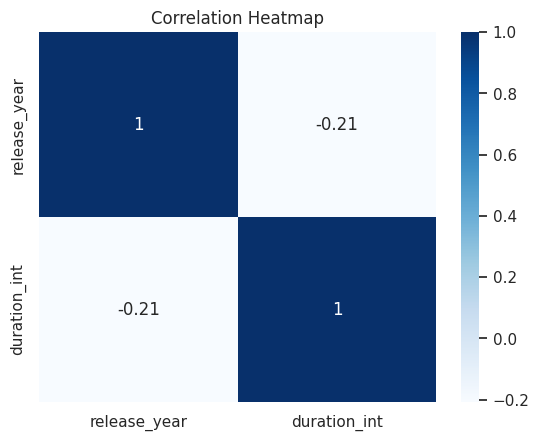

In [42]:
corr = movie_durations[['release_year', 'duration_int']].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

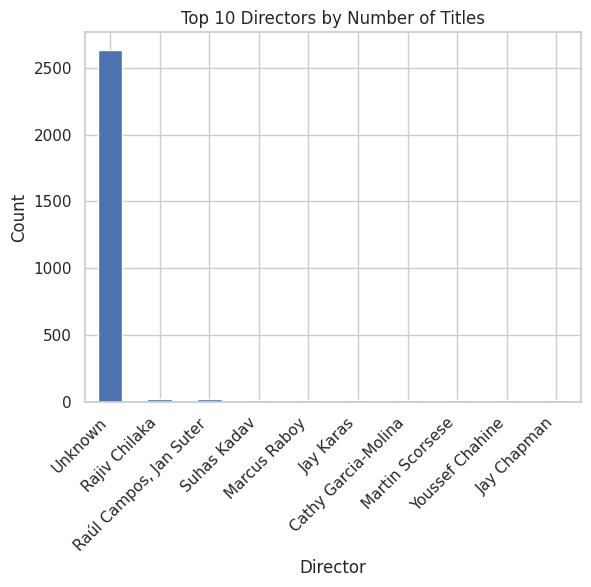

In [44]:
top_directors = df['director'].value_counts().nlargest(10)

top_directors.plot(kind='bar')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

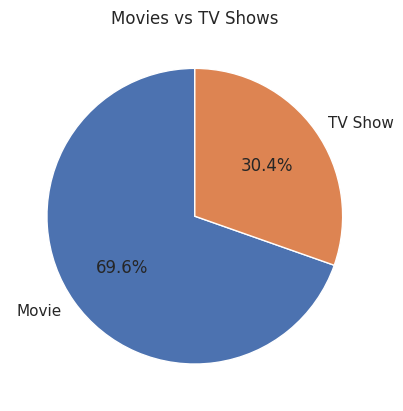

In [46]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows')
plt.ylabel('')
plt.show()